In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
from prody import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import *

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
def evalDCD(currMutation, currRun):
    currDirectory = './' + currMutation + '/' + currRun + '/'
    structure = parsePDB(currDirectory + 'step3_input.pdb')
    
    ensemble1 = parseDCD(currDirectory + 'step5_1.dcd')    
    ensemble2 = parseDCD(currDirectory + 'step5_continue.dcd')  
    ensemble = ensemble1 + ensemble2
    ensemble.setAtoms(structure.calpha)
    ensemble.setCoords(structure)

    ensemble.superpose()
    
    rmsds_refFirst = ensemble.getRMSDs()

    # Superpose the ensemble to the center of frame
    ensemble.iterpose()
    msf = ensemble.getMSFs()
    
    return msf, rmsds_refFirst

In [4]:
# all distances
mutations = ['WT', 'G188Q', 'L155W', 'V135A']
Runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5']

frames = ["{:04}".format(i) for i in range(1, 1001)]

In [4]:
# all distances
mutations = ['WT', 'V135A']
Runs = ['200ns']

frames = ["{:04}".format(i) for i in range(1, 1001)]

In [5]:
allRMSDs_refFirst = {}
allMSFs = {}


for currMutation in mutations:
    if currMutation not in allRMSDs_refFirst:
        allRMSDs_refFirst[currMutation] = {}
    if currMutation not in allMSFs:
        allMSFs[currMutation] = {}
    
    for run in Runs:
        msf, rmsds_refFirst = evalDCD(currMutation, run)
        allRMSDs_refFirst[currMutation][run] = rmsds_refFirst
        allMSFs[currMutation][run] = msf

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175112 atoms and 1 coordinate set(s) were parsed in 2.02s.
@> DCD file contains 834 coordinate sets for 175112 atoms.
@> DCD file was parsed in 13.56 seconds.
@> 1671.40 MB parsed at input rate 123.26 MB/s.
@> 834 coordinate sets parsed at input rate 61 frame/s.
@> DCD file contains 1063 coordinate sets for 175112 atoms.
@> DCD file was parsed in 18.02 seconds.
@> 2130.33 MB parsed at input rate 118.20 MB/s.
@> 1063 coordinate sets parsed at input rate 58 frame/s.
@> Superposition completed in 14.72 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.1880e+01
@> Step #2: RMSD difference = 7.7802e-03
@> Step #3: RMSD difference = 1.0007e-05
@> Iterative superposition completed in 15.70s.
@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175040 atoms and 1 coordinate set(s) were parsed in 1.85s.
@> DCD file contains 794 coordinate sets for 175040 atoms.
@> DCD

In [8]:
len(allRMSDs_refFirst['WT']['200ns'])

1897

In [9]:
len(allRMSDs_refFirst['V135A']['200ns'])

1799

In [12]:
data = {}

for mutate in allRMSDs_refFirst.keys():
    list1 = allRMSDs_refFirst[mutate]['200ns']

    # Zip the lists together
    zipped_lists = zip(list1)

    # Calculate the average of each group of elements
    average_list = [sum(items) / len(items) for items in zipped_lists]

    data[mutate] = average_list

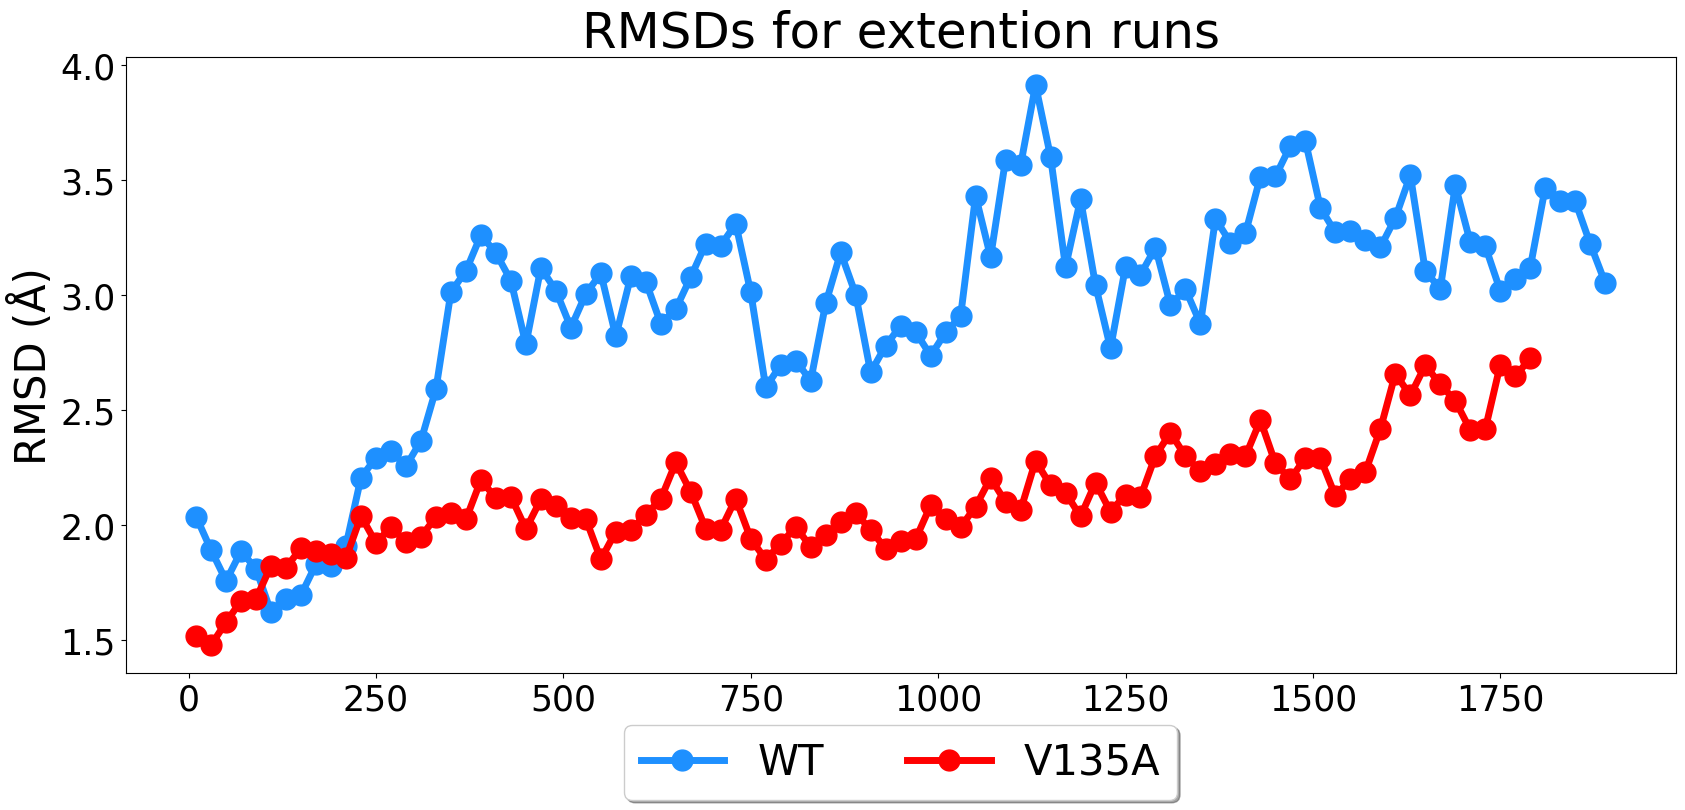

In [18]:
# Colors
colors = ['dodgerblue', 'red']
n = 20 # Gaps

plt.figure(figsize=(20, 8))

# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})

for (series, values), color in zip(data.items(), colors):
    averages = [mean(values[i:i+n]) for i in range(0, len(values), n)]
    # Compute the indices to place each point at the center of the interval
    indices = arange(n/2, len(values), n)

    # Plot the averages
    plt.plot(indices, averages, label=series, color=color, marker='o', linewidth=5, markersize=15)  # Use marker to emphasize the points

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.title('RMSDs for extention runs')
plt.xlabel('Frames')
plt.ylabel('RMSD (Å)')

plt.show()

In [5]:
extract = {
    'loop1':{'A': [182-119, 188-119], 'B': [182-119+1+454-119, 188-119+1+454-119]},
    'loop2':{'A': [399-119, 416-119], 'B': [399-119+1+454-119, 416-119+1+454-119]},
    'loop3':{'A': [339-119, 348-119], 'B': [339-119+1+454-119, 348-119+1+454-119]},
    'lid':{'A': [213-119, 236-119], 'B': [213-119+1+454-119, 236-119+1+454-119]},
}

In [6]:
def evalPartProtein(currMutation, currRun, currSelection, extract):

    currDirectory = './' + currMutation + '/' + currRun + '/'

    structure = parsePDB(currDirectory + 'step3_input.pdb')

    ref_selection = structure.select('resnum ' + str(extract[currSelection]['A'][0] + 119)\
                                     + ' to ' + str(extract[currSelection]['A'][1] + 119))

    ensemble1 = parseDCD(currDirectory + 'step5_1.dcd')    
    ensemble2 = parseDCD(currDirectory + 'step5_continue.dcd')  

    ensemble = ensemble1 + ensemble2
    ensemble.setAtoms(ref_selection.calpha)
    ensemble.setCoords(structure)

    ensemble.superpose()

    rmsds_refFirst = ensemble.getRMSDs()

    # Superpose the ensemble to the center of frame
    ensemble.iterpose()
    msf = ensemble.getMSFs()
    
    return rmsds_refFirst, msf

In [ ]:
loop_RMSDs = {}
loop_MSFs = {}


for currMutation in mutations:
    if currMutation not in loop_RMSDs:
        loop_RMSDs[currMutation] = {}
    if currMutation not in loop_MSFs:
        loop_MSFs[currMutation] = {}
    
    for currSelection in extract.keys():
        if currSelection not in loop_RMSDs[currMutation]:
            loop_RMSDs[currMutation][currSelection] = {}
        if currSelection not in loop_MSFs[currMutation]:
            loop_MSFs[currMutation][currSelection] = {}
        
        for run in Runs:
            rmsds_refFirst, msf = evalPartProtein(currMutation, currRun, currSelection, extract)
            loop_RMSDs[currMutation][currSelection][run] = rmsds_refFirst
            loop_MSFs[currMutation][currSelection][run] = msf

In [7]:
rmsds_refFirst, msf = evalPartProtein('WT', 'Run1', 'loop1', extract)

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175112 atoms and 1 coordinate set(s) were parsed in 2.08s.
@> DCD file contains 500 coordinate sets for 175112 atoms.
@> DCD file was parsed in 1.17 seconds.
@> 1002.04 MB parsed at input rate 857.08 MB/s.
@> 500 coordinate sets parsed at input rate 427 frame/s.
@> DCD file contains 500 coordinate sets for 175112 atoms.
@> DCD file was parsed in 6.47 seconds.
@> 1002.04 MB parsed at input rate 154.86 MB/s.
@> 500 coordinate sets parsed at input rate 77 frame/s.
@> Superposition completed in 7.87 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.2419e+01
@> Step #2: RMSD difference = 3.1316e-02
@> Step #3: RMSD difference = 1.7103e-04
@> Step #4: RMSD difference = 1.3727e-05
@> Iterative superposition completed in 11.77s.


In [11]:
currMutation = 'WT'
run = 'Run1'
currSelection = 'loop1'
save('./Results_Apr17/Metric_parts/RMSD_' + currMutation \
     + '_' + run + '_' + currSelection +'.npy', rmsds_refFirst)

In [12]:
save('./Results_Apr17/Metric_parts/MSF_' + currMutation \
     + '_' + run + '_' + currSelection +'.npy', msf)

In [8]:
currMutation = 'WT'
RMSD_WT = {}
MSF_WT = {}

for currSelection in ['lid']:
    for run in Runs:
        rmsds_refFirst, msf = evalPartProtein(currMutation, run, currSelection, extract)
        save('./Results_Apr17/Metric_parts/RMSD_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', rmsds_refFirst)
        save('./Results_Apr17/Metric_parts/MSF_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', msf)

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175112 atoms and 1 coordinate set(s) were parsed in 2.11s.
@> DCD file contains 500 coordinate sets for 175112 atoms.
@> DCD file was parsed in 6.66 seconds.
@> 1002.04 MB parsed at input rate 150.43 MB/s.
@> 500 coordinate sets parsed at input rate 75 frame/s.
@> DCD file contains 500 coordinate sets for 175112 atoms.
@> DCD file was parsed in 6.48 seconds.
@> 1002.04 MB parsed at input rate 154.69 MB/s.
@> 500 coordinate sets parsed at input rate 77 frame/s.
@> Superposition completed in 8.04 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.2727e+01
@> Step #2: RMSD difference = 2.6666e-02
@> Step #3: RMSD difference = 2.2694e-04
@> Step #4: RMSD difference = 5.6630e-06
@> Iterative superposition completed in 10.80s.
@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175112 atoms and 1 coordinate set(s) were parsed in 1.98s.
@> DCD file contains 500 coor

In [7]:
currMutation = 'G188Q' # 'G188Q', 'L155W', 'V135A'
RMSD_GQ = {}
MSF_GQ = {}

for currSelection in ['lid']:
    for run in Runs:
        rmsds_refFirst, msf = evalPartProtein(currMutation, run, currSelection, extract)
        print (currSelection, run, 'finished!')
        save('./Results_Apr17/Metric_parts/RMSD_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', rmsds_refFirst)
        save('./Results_Apr17/Metric_parts/MSF_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', msf)

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175225 atoms and 1 coordinate set(s) were parsed in 2.21s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.52 seconds.
@> 1002.68 MB parsed at input rate 153.80 MB/s.
@> 500 coordinate sets parsed at input rate 76 frame/s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.53 seconds.
@> 1002.68 MB parsed at input rate 153.66 MB/s.
@> 500 coordinate sets parsed at input rate 76 frame/s.
@> Superposition completed in 7.32 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.2448e+01
@> Step #2: RMSD difference = 3.0368e-02
@> Step #3: RMSD difference = 1.6840e-04
@> Step #4: RMSD difference = 7.7191e-06
@> Iterative superposition completed in 11.64s.


lid Run1 finished!


@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175225 atoms and 1 coordinate set(s) were parsed in 1.89s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.67 seconds.
@> 1002.68 MB parsed at input rate 150.25 MB/s.
@> 500 coordinate sets parsed at input rate 74 frame/s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.69 seconds.
@> 1002.68 MB parsed at input rate 149.92 MB/s.
@> 500 coordinate sets parsed at input rate 74 frame/s.
@> Superposition completed in 7.77 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.4421e+01
@> Step #2: RMSD difference = 1.7031e-02
@> Step #3: RMSD difference = 4.4380e-05
@> Iterative superposition completed in 7.49s.


lid Run2 finished!


@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175225 atoms and 1 coordinate set(s) were parsed in 1.91s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.82 seconds.
@> 1002.68 MB parsed at input rate 147.08 MB/s.
@> 500 coordinate sets parsed at input rate 73 frame/s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.67 seconds.
@> 1002.68 MB parsed at input rate 150.24 MB/s.
@> 500 coordinate sets parsed at input rate 74 frame/s.
@> Superposition completed in 7.54 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.1594e+01
@> Step #2: RMSD difference = 3.3440e-02
@> Step #3: RMSD difference = 1.9442e-04
@> Step #4: RMSD difference = 6.0856e-06
@> Iterative superposition completed in 11.14s.


lid Run3 finished!


@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175225 atoms and 1 coordinate set(s) were parsed in 1.92s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.60 seconds.
@> 1002.68 MB parsed at input rate 151.93 MB/s.
@> 500 coordinate sets parsed at input rate 75 frame/s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.70 seconds.
@> 1002.68 MB parsed at input rate 149.75 MB/s.
@> 500 coordinate sets parsed at input rate 74 frame/s.
@> Superposition completed in 7.37 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.3636e+01
@> Step #2: RMSD difference = 2.2545e-02
@> Step #3: RMSD difference = 9.4111e-05
@> Iterative superposition completed in 7.93s.


lid Run4 finished!


@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175225 atoms and 1 coordinate set(s) were parsed in 1.95s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.73 seconds.
@> 1002.68 MB parsed at input rate 149.06 MB/s.
@> 500 coordinate sets parsed at input rate 74 frame/s.
@> DCD file contains 500 coordinate sets for 175225 atoms.
@> DCD file was parsed in 6.82 seconds.
@> 1002.68 MB parsed at input rate 147.12 MB/s.
@> 500 coordinate sets parsed at input rate 73 frame/s.
@> Superposition completed in 7.83 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.2332e+01
@> Step #2: RMSD difference = 1.3632e-02
@> Step #3: RMSD difference = 3.4773e-05
@> Iterative superposition completed in 7.41s.


lid Run5 finished!


In [7]:
currMutation = 'L155W' # 'G188Q', 'L155W', 'V135A'

for currSelection in ['lid']:
    for run in ['Run4', 'Run5']:
        rmsds_refFirst, msf = evalPartProtein(currMutation, run, currSelection, extract)
        save('./Results_Apr17/Metric_parts/RMSD_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', rmsds_refFirst)
        save('./Results_Apr17/Metric_parts/MSF_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', msf)

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175146 atoms and 1 coordinate set(s) were parsed in 2.19s.
@> DCD file contains 500 coordinate sets for 175146 atoms.
@> DCD file was parsed in 6.73 seconds.
@> 1002.23 MB parsed at input rate 149.00 MB/s.
@> 500 coordinate sets parsed at input rate 74 frame/s.
@> DCD file contains 500 coordinate sets for 175146 atoms.
@> DCD file was parsed in 6.62 seconds.
@> 1002.23 MB parsed at input rate 151.41 MB/s.
@> 500 coordinate sets parsed at input rate 75 frame/s.
@> Superposition completed in 7.94 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.6314e+01
@> Step #2: RMSD difference = 2.9117e-02
@> Step #3: RMSD difference = 1.4856e-04
@> Step #4: RMSD difference = 6.6910e-06
@> Iterative superposition completed in 12.16s.
@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175146 atoms and 1 coordinate set(s) were parsed in 1.88s.
@> DCD file contains 500 coor

In [7]:
currMutation = 'V135A' # 'G188Q', 'L155W', 'V135A'
RMSD_GQ = {}
MSF_GQ = {}

for currSelection in ['lid']:
    for run in Runs:M
        rmsds_refFirst, msf = evalPartProtein(currMutation, run, currSelection, extract)
        save('./Results_Apr17/Metric_parts/RMSD_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', rmsds_refFirst)
        save('./Results_Apr17/Metric_parts/MSF_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy', msf)

@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175040 atoms and 1 coordinate set(s) were parsed in 2.22s.
@> DCD file contains 500 coordinate sets for 175040 atoms.
@> DCD file was parsed in 6.87 seconds.
@> 1001.63 MB parsed at input rate 145.85 MB/s.
@> 500 coordinate sets parsed at input rate 72 frame/s.
@> DCD file contains 500 coordinate sets for 175040 atoms.
@> DCD file was parsed in 6.77 seconds.
@> 1001.63 MB parsed at input rate 147.85 MB/s.
@> 500 coordinate sets parsed at input rate 73 frame/s.
@> Superposition completed in 7.60 seconds.
@> Starting iterative superposition:
@> Step #1: RMSD difference = 6.1132e+01
@> Step #2: RMSD difference = 4.1980e-02
@> Step #3: RMSD difference = 1.1043e-04
@> Step #4: RMSD difference = 6.2079e-06
@> Iterative superposition completed in 12.27s.
@> WARNING parsed 5 digit residue number including numeric insertion code
@> 175040 atoms and 1 coordinate set(s) were parsed in 1.89s.
@> DCD file contains 500 coor

In [9]:
loop_RMSDs = {}
loop_MSFs = {}


for currMutation in mutations:
    if currMutation not in loop_RMSDs:
        loop_RMSDs[currMutation] = {}
    if currMutation not in loop_MSFs:
        loop_MSFs[currMutation] = {}
    
    for currSelection in extract.keys():
        if currSelection not in loop_RMSDs[currMutation]:
            loop_RMSDs[currMutation][currSelection] = {}
        if currSelection not in loop_MSFs[currMutation]:
            loop_MSFs[currMutation][currSelection] = {}
        
        for run in Runs:
            loop_RMSDs[currMutation][currSelection][run] = load('./Results_Apr17/Metric_parts/RMSD_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy')
            loop_MSFs[currMutation][currSelection][run] = load('./Results_Apr17/Metric_parts/MSF_' + currMutation \
             + '_' + run + '_' + currSelection +'.npy')

In [11]:
loop_RMSDs

{'WT': {'loop1': {'Run1': array([1.62145807, 2.03592523, 3.19827993, 2.52781509, 3.70363384,
          1.29817777, 1.09812958, 1.74216226, 2.12685101, 3.62352762,
          3.54170291, 6.28105714, 1.5586372 , 1.18555386]),
   'Run2': array([2.01798702, 2.47310482, 3.96850403, 4.53221084, 7.30086034,
          1.73287679, 1.15984131, 1.24858651, 2.10584302, 4.73886425,
          6.38110694, 8.87274084, 1.47116654, 1.16511745]),
   'Run3': array([1.6523151 , 2.56865855, 5.75104267, 4.55639281, 5.37511293,
          1.67258625, 1.95931162, 1.06163431, 1.63178461, 3.90439789,
          5.13539354, 4.63535894, 1.90115138, 1.80821924]),
   'Run4': array([2.79860703, 3.37299173, 5.83821729, 3.74477615, 6.99589328,
          2.62148563, 1.6612174 , 1.28042299, 1.57979635, 2.9324459 ,
          3.16867542, 3.68277043, 1.58534357, 1.82366831]),
   'Run5': array([1.96740323, 2.26338206, 3.40902715, 3.86900977, 3.8071513 ,
          1.40974865, 0.94611264, 2.63707408, 2.59597559, 3.25240251,
     

In [29]:
currPart = 'lid'

data_RMSD = {}
for mutate in loop_RMSDs.keys():
    list1 = loop_RMSDs[mutate][currPart]['Run1']
    list2 = loop_RMSDs[mutate][currPart]['Run2']
    list3 = loop_RMSDs[mutate][currPart]['Run3']
    list4 = loop_RMSDs[mutate][currPart]['Run4']
    list5 = loop_RMSDs[mutate][currPart]['Run5']
    # Zip the lists together
    zipped_lists = zip(list1, list2, list3, list4, list5)

    # Calculate the average of each group of elements
    average_list = [sum(items) / len(items) for items in zipped_lists]

    data_RMSD[mutate] = average_list

Text(0, 0.5, 'RMSD (Å)')

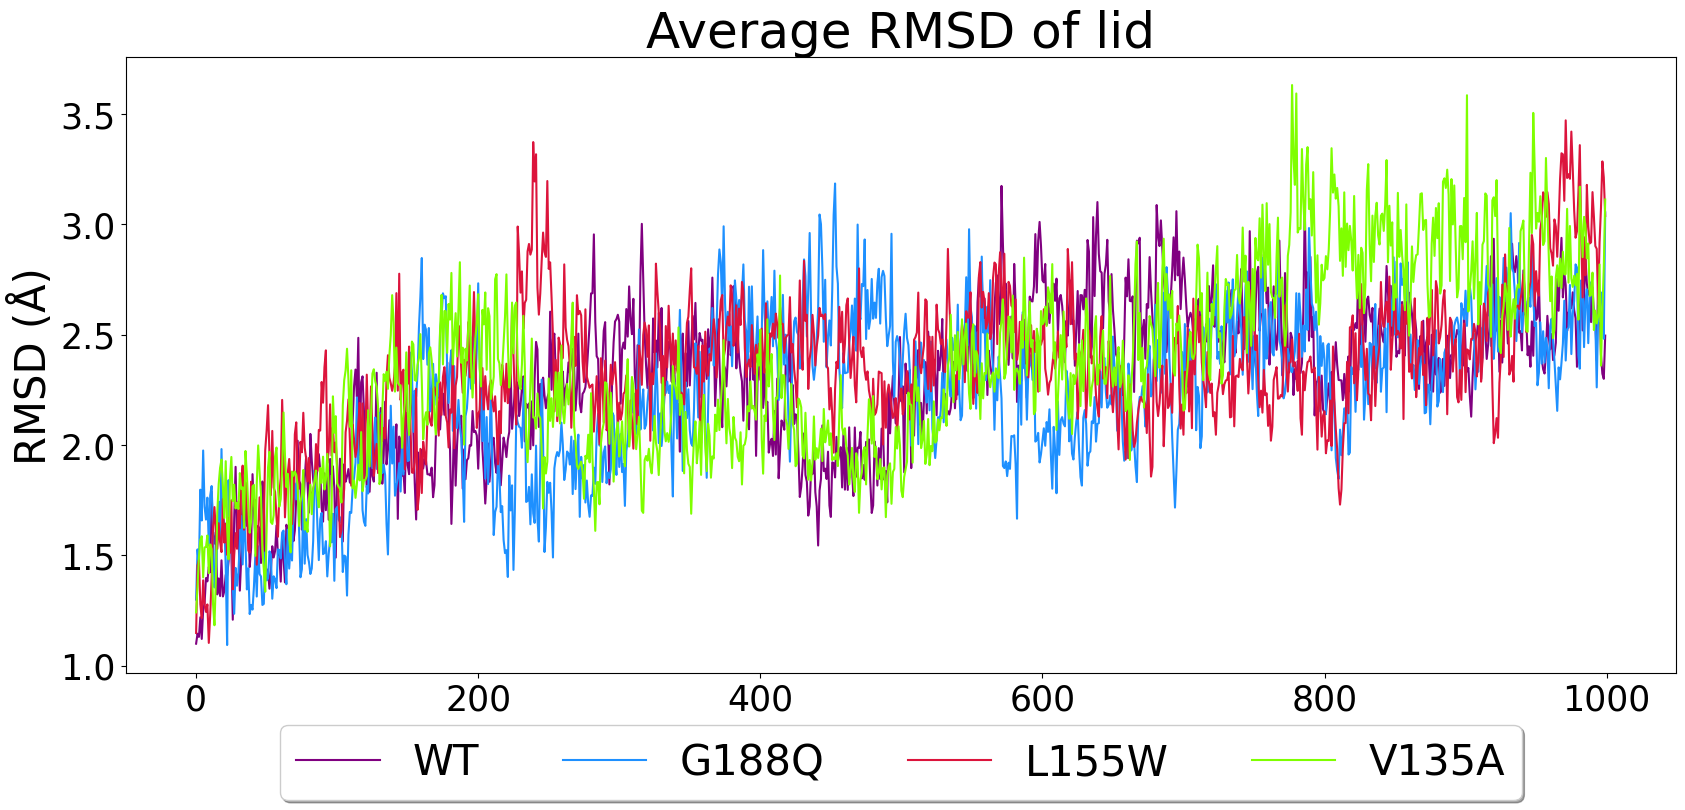

In [30]:
# Colors
colors = ['purple', 'dodgerblue', 'crimson', 'chartreuse']

plt.figure(figsize=(20, 8))

# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})

for (series, values), color in zip(data_RMSD.items(), colors):
    plt.plot(values, label=series, color=color)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.title('Average RMSD of ' + currPart)
plt.xlabel('Frames')
plt.ylabel('RMSD (Å)')

Text(0, 0.5, 'RMSD (Å)')

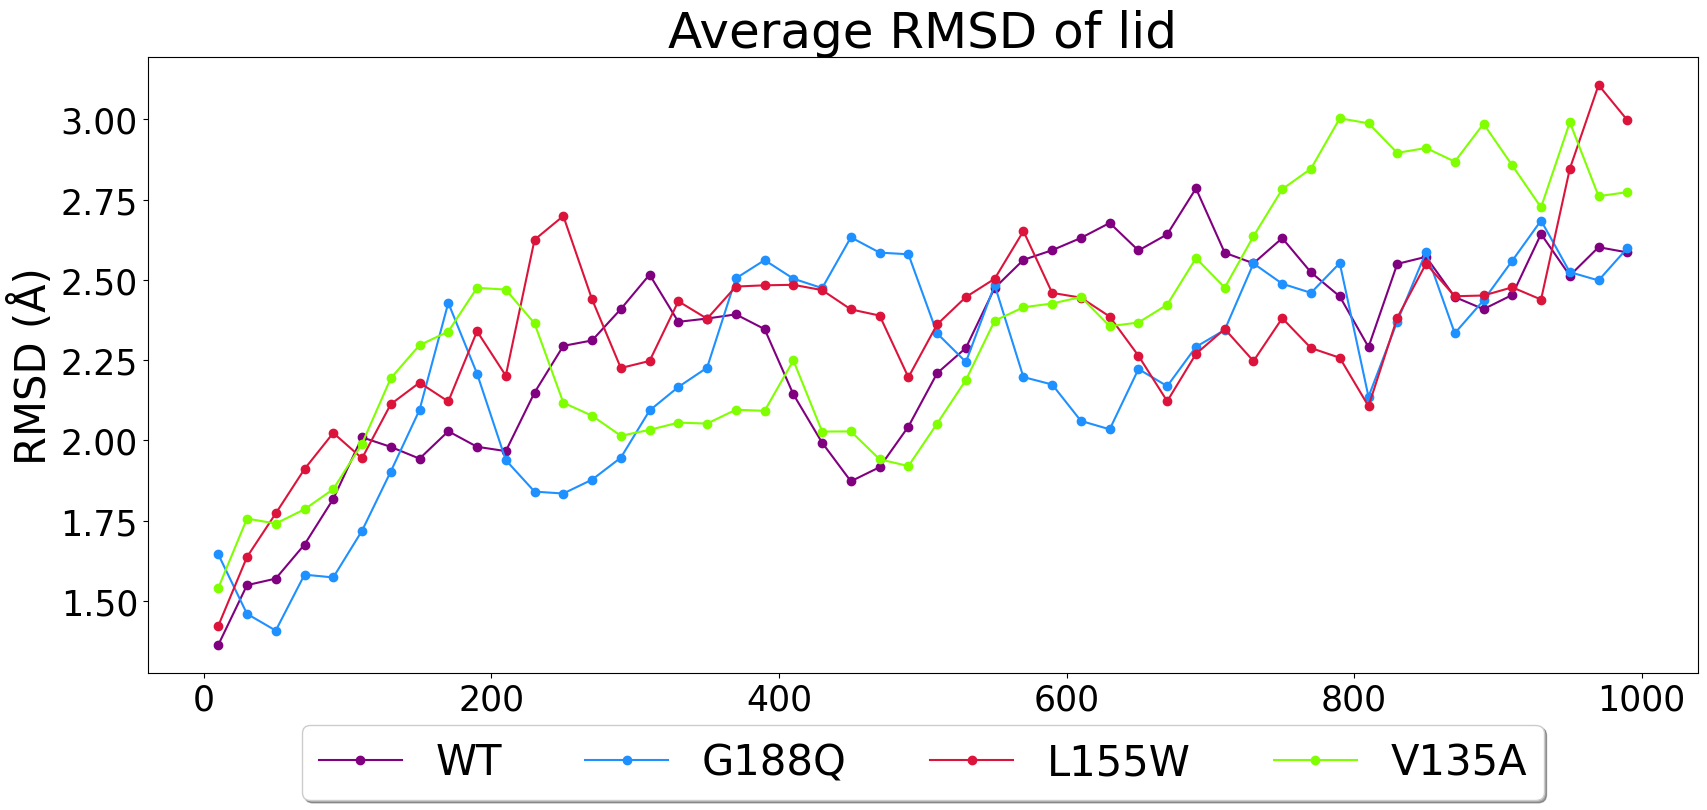

In [31]:
n = 20

plt.figure(figsize=(20, 8))

# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})


for (series, values), color in zip(data_RMSD.items(), colors):
    averages = [mean(values[i:i+n]) for i in range(0, len(values), n)]
    # Compute the indices to place each point at the center of the interval
    indices = arange(n/2, len(values), n)

    # Plot the averages
    plt.plot(indices, averages, label=series, color=color, marker='o')  # Use marker to emphasize the points


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.title('Average RMSD of ' + currPart)
plt.xlabel('Frames')
plt.ylabel('RMSD (Å)')


In [ ]:
extract = {
    'loop1':{'A': [182-119, 188-119], 'B': [182-119+1+454-119, 188-119+1+454-119]},
    'loop2':{'A': [399-119, 416-119], 'B': [399-119+1+454-119, 416-119+1+454-119]},
    'loop3':{'A': [339-119, 348-119], 'B': [339-119+1+454-119, 348-119+1+454-119]},
    'lid':{'A': [213-119, 236-119], 'B': [213-119+1+454-119, 236-119+1+454-119]},
}

In [41]:
currPart = 'lid'

data_MSF = {}
for mutate in loop_RMSDs.keys():
    list1 = loop_MSFs[mutate][currPart]['Run1']
    list2 = loop_MSFs[mutate][currPart]['Run2']
    list3 = loop_MSFs[mutate][currPart]['Run3']
    list4 = loop_MSFs[mutate][currPart]['Run4']
    list5 = loop_MSFs[mutate][currPart]['Run5']
    # Zip the lists together
    zipped_lists = zip(list1, list2, list3, list4, list5)

    # Calculate the average of each group of elements
    average_list = [sum(items) / len(items) for items in zipped_lists]

    data_MSF[mutate] = average_list

([<matplotlib.axis.XTick at 0x7f9c45803510>,
 [Text(0, 0, 'A:213'),
  Text(10, 0, 'A:223'),
  Text(20, 0, 'A:233'),
  Text(30, 0, 'B:219'),
  Text(40, 0, 'B:229'),
  Text(47, 0, 'B:236')])

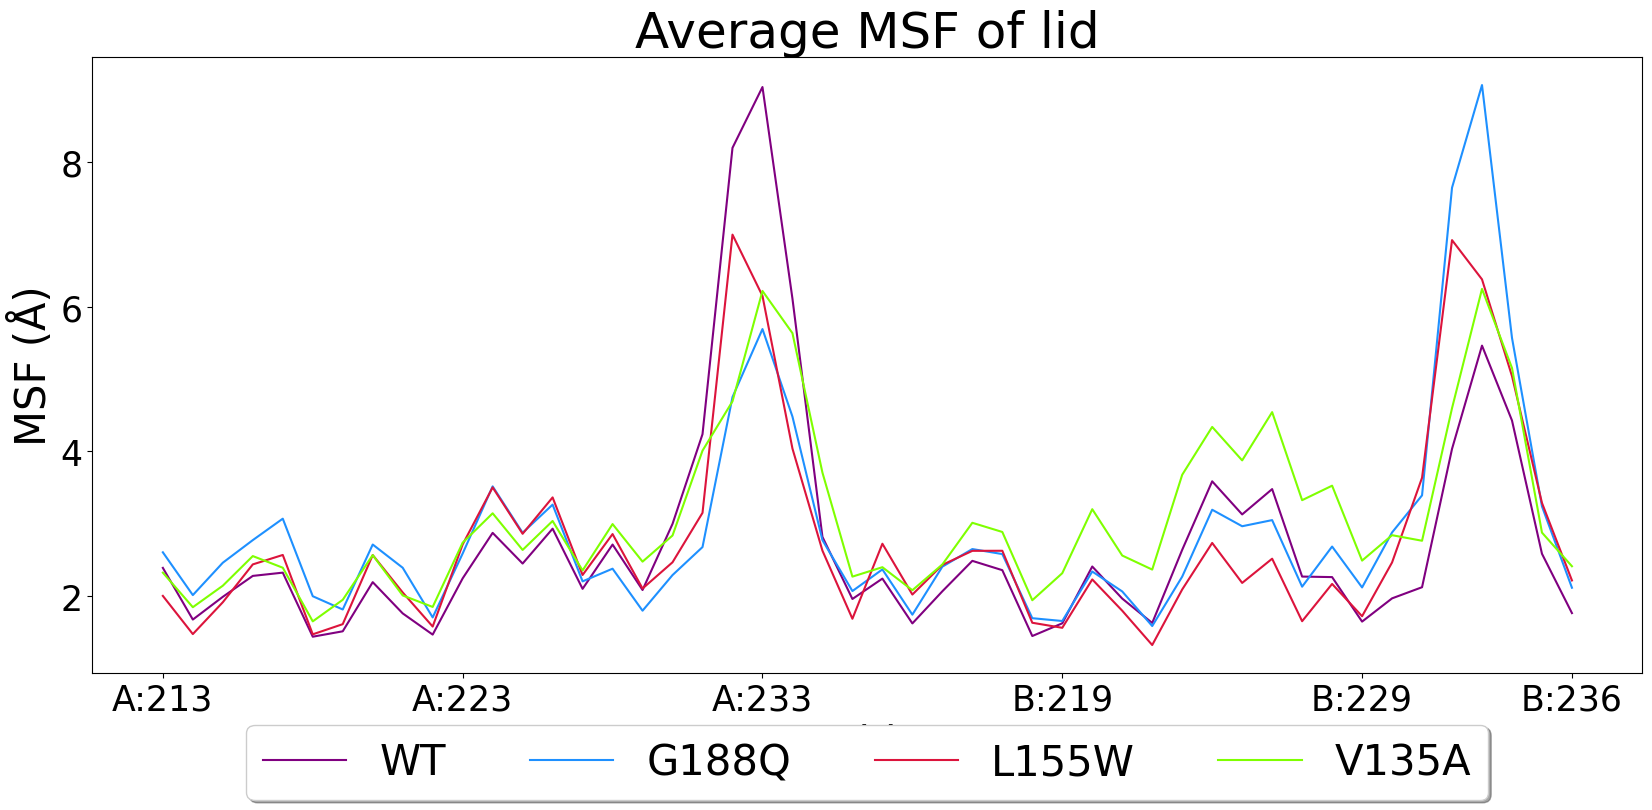

In [50]:
# Colors
colors = ['purple', 'dodgerblue', 'crimson', 'chartreuse']

plt.figure(figsize=(20, 8))

# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 30})

for (series, values), color in zip(data_MSF.items(), colors):
    plt.plot(values, label=series, color=color)


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=4)
plt.title('Average MSF of ' + currPart)
plt.xlabel('Residue')
plt.ylabel('MSF (Å)')

# Labels = ['A:182', 'A:184', 'A:186', 'A:188', 'B:184', 'B:186', 'B:188']
# plt.xticks([0, 2, 4, 6, 8, 10, 12], Labels)

# Labels = ['A:399', 'A:404', 'A:409', 'A:414', 'B:401', 'B:406', 'B:411', 'B:416']
# plt.xticks([0, 5, 10, 15, 20, 25, 30, 35], Labels)

# Labels = ['A:339', 'A:342', 'A:345', 'A:348', 'B:341', 'B:344', 'B:347']
# plt.xticks([0, 3, 6, 9, 12, 15, 18], Labels)

Labels = ['A:213', 'A:223', 'A:233', 'B:219', 'B:229', 'B:236']
plt.xticks([0, 10, 20, 30, 40, 47], Labels)


In [52]:
2**0.5

1.4142135623730951